In [117]:
cov <- function(df_col) {
    mean_ratio <- mean(df_col, na.rm = TRUE)
    sd_ratio <- sd(df_col, na.rm = TRUE)
    cov_value <- (sd_ratio / mean_ratio) * 100
    return(cov_value)
}


In [118]:
prb = function(df_sp,df_sr) {
    valid <- !is.na(df_sp) & !is.na(df_sr)
    df_sp <- df_sp[valid]
    df_sr <- df_sr[valid]
    if (length(df_sr) < 2) {
        return(NA)
    }
    model <- lm(df_sr ~ df_sp)
    
    # PRB is the slope of the regression model
    prb <- coef(model)[2]
    return(prb)
}

In [119]:
cod = function(df_col) {
    median_ratio <- median(df_col, na.rm = TRUE)
    cod <- mean(abs(df_col - median_ratio), na.rm = TRUE) / median_ratio * 100
    
    return(cod)
}

In [120]:
prd = function(df_av,df_sp,df_sr) {
mean_ratio = mean(df_sr, na.rm = TRUE)
weighted_mean_ratio = sum(df_av, na.rm = TRUE) / sum(df_sp, na.rm = TRUE)
prd = mean_ratio / weighted_mean_ratio
return (prd)
}

In [121]:
library(readxl)
library(dplyr)
library(stringr)

df <- read_excel("CountyMap.xlsx") %>%
  mutate(Grouping = I(strsplit(as.character(Grouping), "-")),County = str_to_sentence(County))

mapping_df <- df %>%
group_by(County, Type) %>%
summarise(Values = I(list(Grouping)), .groups = "drop")
mapping_list <- setNames(mapping_df$Values, 
                         paste(mapping_df$County, mapping_df$Type, sep = " "))

for (i in (1:length(mapping_list['Adams Residential Improved'][[1]]))) {
    print(mapping_list['Adams Residential Improved'][[1]][i])
}
##print(mapping_list['Adams Residential Improved'])
print(mapping_list['Adams Residential Improved'][[1]])

[[1]]
[1] "Blue Creek" "French"     "Kirkland"   "Monroe"     "St. Marys" 

[[1]]
[1] "Hartford"  "Jefferson" "Wabash"   

[[1]]
[1] "Preble" "Union" 

[[1]]
[1] "Washington"

[[1]]
[1] "Root"

[[1]]
[1] "Blue Creek" "French"     "Kirkland"   "Monroe"     "St. Marys" 

[[2]]
[1] "Hartford"  "Jefferson" "Wabash"   

[[3]]
[1] "Preble" "Union" 

[[4]]
[1] "Washington"

[[5]]
[1] "Root"



In [122]:
wkbk23 = read.csv('tippecanoe/Combined_Workbook_2023.csv')
exc23 = read.csv('tippecanoe/Combined_Reconciliation_2023.csv')
rat23 = read.csv('tippecanoe/Combined_Study_2023.csv')
classifications23 = read.csv('tippecanoe/Parcel_Clusters_2023.csv')
class = read.csv('tippecanoe/Parcel_Classifications_2023.csv')
ag22 = read.csv('tippecanoe/Ag_Sales_2022.csv')
ag23 = read.csv('tippecanoe/Ag_Sales_2023.csv')
ag24 = read.csv('tippecanoe/Ag_Sales_2024.csv')



In [123]:
nrow(exc23)

[1] 91160

In [124]:
exc23 = exc23[!is.na(exc23$ParcelNumber),]

In [125]:
nrow(exc23)

[1] 91094

In [126]:
nrow(rat23)

[1] 116833

In [127]:
colnames(ag22)

[1] "X.1"                   "X"                     "SaleID"               
 [4] "Instance"              "ParcelNumber"          "Subdivision"          
 [7] "Address"               "City"                  "StateZip"             
[10] "MailingAddress"        "MailingCity"           "MailingStateZip"      
[13] "ParcelDescription"     "ParcelNumber2"         "LandAV"               
[16] "ImpAV"                 "PPAV"                  "TotalAV"              
[19] "PropertyClass"         "Neighborhood"          "TaxDistrict"          
[22] "Acre4"                 "Acre"                  "SalePrice2"           
[25] "SalePrice"             "PP2"                   "PP"                   
[28] "SellerPoints2"         "SellerPoints"          "RelationshipDiscount2"
[31] "RelationshipDiscount"  "County"

In [128]:
ag22$SaleRatio = ag22$TotalAV / ag22$SalePrice
ag23$SaleRatio = ag23$TotalAV / ag23$SalePrice
ag24$SaleRatio = ag24$TotalAV / ag24$SalePrice

In [129]:
ag22$PPA = ag22$SalePrice / ag22$Acre
ag23$PPA = ag23$SalePrice / ag23$Acre
ag24$PPA = ag24$SalePrice / ag24$Acre

In [130]:
ag22 = ag22[ag22$PropertyClass < 200 & ag22$PropertyClass >= 100 & ag22$SalePrice > 10000 & ag22$PPA < 16000,]
ag23 = ag23[ag23$PropertyClass < 200 & ag23$PropertyClass >= 100 & ag23$SalePrice > 10000 & ag23$PPA < 16000,]
ag24 = ag24[ag24$PropertyClass < 200 & ag24$PropertyClass >= 100 & ag24$SalePrice > 10000 & ag24$PPA < 16000,]

In [131]:
mad_x = median(abs(ag22$SaleRatio - 0.2), na.rm = TRUE)
mod_z <- 0.6745 * (ag22$SaleRatio - 0.2) / mad_x
threshold <- quantile(abs(mod_z), 0.95, na.rm = TRUE)
ag22o = ag22[abs(mod_z) > threshold, ]
ag22 <- ag22[abs(mod_z) <= threshold, ]
mad_x = median(abs(ag23$SaleRatio - 0.2), na.rm = TRUE)
mod_z <- 0.6745 * (ag23$SaleRatio - 0.2) / mad_x
threshold <- quantile(abs(mod_z), 0.95, na.rm = TRUE)
ag23o = ag23[abs(mod_z) > threshold, ]
ag23 <- ag23[abs(mod_z) <= threshold, ]
mad_x = median(abs(ag24$SaleRatio - 0.2), na.rm = TRUE)
mod_z <- 0.6745 * (ag24$SaleRatio - 0.2) / mad_x
threshold <- quantile(abs(mod_z), 0.95, na.rm = TRUE)
ag24o = ag24[abs(mod_z) > threshold, ]
ag24 <- ag24[abs(mod_z) <= threshold, ]

In [132]:
agoutliers = rbind(ag22o,ag23o,ag24o)

In [133]:
ag22 <- ag22 %>%
  mutate(
    State = substr(StateZip, 1, 2),
    Zip = substr(StateZip, 3, 7)
  )
ag23 <- ag23 %>%
  mutate(
    State = substr(StateZip, 1, 2),
    Zip = substr(StateZip, 3, 7)
  )
ag24 <- ag24 %>%
  mutate(
    State = substr(StateZip, 1, 2),
    Zip = substr(StateZip, 3, 7)
  )
agoutliers <- agoutliers %>%
  mutate(
    State = substr(StateZip, 1, 2),
    Zip = substr(StateZip, 3, 7)
  )

In [134]:
ag22$Zip = as.numeric(ag22$Zip)
ag23$Zip = as.numeric(ag23$Zip)
ag24$Zip = as.numeric(ag24$Zip)
agoutliers$Zip = as.numeric(agoutliers$Zip)

In [135]:
ag22 = ag22[!is.na(ag22$Zip),]
ag23 = ag23[!is.na(ag23$Zip),]
ag24 = ag24[!is.na(ag24$Zip),]
agoutliers = agoutliers[!is.na(agoutliers$Zip),]

In [136]:
ag22$Zip = as.character(ag22$Zip)
ag23$Zip = as.character(ag23$Zip)
ag24$Zip = as.character(ag24$Zip)
agoutliers$Zip = as.character(agoutliers$Zip)

In [137]:
nrow(agoutliers)
round(((table(agoutliers$PropertyClass) / nrow(agoutliers)) * 100),2)
round(((table(ag22$PropertyClass) / nrow(ag22)) * 100),2)

[1] 778


  100   101   102   103   104   110   141   149   199 
16.20 69.67  0.90  1.54  0.26  0.13  1.80  0.64  8.87 


  100   101   102   103   104   105   108   111   120   141   149   199 
68.38 21.50  0.08  0.03  0.05  0.03  0.01  0.04  0.97  0.86  0.52  7.53 

In [138]:
median(ag22$SaleRatio[ag22$PropertyClass == 101])
median(ag22$SaleRatio[ag22$PropertyClass != 101])
#ag22 = ag22[ag22$PropertyClass != 101 & ag22$PropertyClass != 199,]

[1] 0.5048396

[1] 0.1250503

In [144]:
mr = median(ag22$SaleRatio,na.rm=TRUE)
mr
ag22$Deviation = abs(ag22$SaleRatio - mr)
nrow(ag22[ag22$Deviation > 0.15,]) / nrow(ag22)

[1] 0.15

[1] 0.2709098

In [107]:
class = class %>%
group_by(Zip,County) %>%
summarise(Zip = first(Zip),County = first(County),ZipClassification = first(ZipClassification))
head(class)
nrow(class)

`summarise()` has grouped output by 'Zip'. You can override using the `.groups`
argument.


Zip,County,ZipClassification
<int>,<chr>,<chr>
40026,Clark,Urban
40059,Clark,Urban
40202,Clark,Urban
40212,Clark,Urban
40212,Floyd,Urban
40222,Clark,Urban


[1] 1267

In [108]:
ag22$Zip = as.numeric(ag22$Zip)
ag23$Zip = as.numeric(ag23$Zip)
ag24$Zip = as.numeric(ag24$Zip)

In [109]:
nrow(ag22)
colnames(ag22)
ag22 = inner_join(ag22,class,by=c('Zip'='Zip','County'='County'),relationship='many-to-many')
nrow(ag22)

[1] 5218

[1] "X.1"                   "X"                     "SaleID"               
 [4] "Instance"              "ParcelNumber"          "Subdivision"          
 [7] "Address"               "City"                  "StateZip"             
[10] "MailingAddress"        "MailingCity"           "MailingStateZip"      
[13] "ParcelDescription"     "ParcelNumber2"         "LandAV"               
[16] "ImpAV"                 "PPAV"                  "TotalAV"              
[19] "PropertyClass"         "Neighborhood"          "TaxDistrict"          
[22] "Acre4"                 "Acre"                  "SalePrice2"           
[25] "SalePrice"             "PP2"                   "PP"                   
[28] "SellerPoints2"         "SellerPoints"          "RelationshipDiscount2"
[31] "RelationshipDiscount"  "County"                "SaleRatio"            
[34] "PPA"                   "State"                 "Zip"

[1] 4574

In [110]:
nrow(ag23)
ag23 = inner_join(ag23,class,by=c('Zip'='Zip','County'='County'),relationship='many-to-many')
nrow(ag23)

[1] 6056

[1] 5485

In [111]:
nrow(ag24)
ag24 = inner_join(ag24,class,by=c('Zip'='Zip','County'='County'),relationship='many-to-many')
nrow(ag24)

[1] 1355

[1] 1184

In [112]:
ag22u = ag22[ag22$ZipClassification == 'Urban',]
ag23u = ag23[ag23$ZipClassification == 'Urban',]
ag24u = ag24[ag24$ZipClassification == 'Urban',]
ag22r = ag22[ag22$ZipClassification == 'Rural',]
ag23r = ag23[ag23$ZipClassification == 'Rural',]
ag24r = ag24[ag24$ZipClassification == 'Rural',]

In [115]:
median = round(median(ag22u$SaleRatio,na.rm=TRUE),2)
cod2 = round(cod(ag22u$SaleRatio),2)
cov2 = round(cov(ag22u$SaleRatio),2)
prd2 = round(prd(ag22u$TotalAV,ag22u$SalePrice,ag22u$SaleRatio),2)
prb2 = round(prb(ag22u$SalePrice,ag22u$SaleRatio),2)
print(paste('2022 Urban Ag Land: Median:',median,'COD:',cod2,'COV:',cov2,'PRD:',prd2,'PRB:',prb2,
            'with',nrow(ag22u),'sales'))
median = round(median(ag22r$SaleRatio,na.rm=TRUE),2)
cod2 = round(cod(ag22r$SaleRatio),2)
cov2 = round(cov(ag22r$SaleRatio),2)
prd2 = round(prd(ag22r$TotalAV,ag22r$SalePrice,ag22r$SaleRatio),2)
prb2 = round(prb(ag22r$SalePrice,ag22r$SaleRatio),2)
print(paste('2022 Rural Ag Land: Median:',median,'COD:',cod2,'COV:',cov2,'PRD:',prd2,'PRB:',prb2,
            'with',nrow(ag22r),'sales'))

[1] "2022 Urban Ag Land: Median: 0.12 COD: 49.28 COV: 120.53 PRD: 1.32 PRB: 0 with 836 sales"
[1] "2022 Rural Ag Land: Median: 0.12 COD: 50.89 COV: 124.33 PRD: 1.29 PRB: 0 with 3738 sales"


In [27]:
median = round(median(ag23u$SaleRatio,na.rm=TRUE),2)
cod2 = round(cod(ag23u$SaleRatio),2)
cov2 = round(cov(ag23u$SaleRatio),2)
prd2 = round(prd(ag23u$TotalAV,ag23u$SalePrice,ag23u$SaleRatio),2)
prb2 = round(prb(ag23u$SalePrice,ag23u$SaleRatio),2)
print(paste('2023 Urban Ag Land: Median:',median,'COD:',cod2,'COV:',cov2,'PRD:',prd2,'PRB:',prb2,
            'with',nrow(ag23u),'sales'))
median = round(median(ag23r$SaleRatio,na.rm=TRUE),2)
cod2 = round(cod(ag23r$SaleRatio),2)
cov2 = round(cov(ag23r$SaleRatio),2)
prd2 = round(prd(ag23r$TotalAV,ag23r$SalePrice,ag23r$SaleRatio),2)
prb2 = round(prb(ag23r$SalePrice,ag23r$SaleRatio),2)
print(paste('2023 Rural Ag Land: Median:',median,'COD:',cod2,'COV:',cov2,'PRD:',prd2,'PRB:',prb2,
            'with',nrow(ag23r),'sales'))

[1] "2023 Urban Ag Land: Median: 0.16 COD: 147.61 COV: 126.6 PRD: 1.27 PRB: 0 with 867 sales"
[1] "2023 Rural Ag Land: Median: 0.18 COD: 138.13 COV: 120.09 PRD: 1.36 PRB: 0 with 4618 sales"


In [28]:
median = round(median(ag24u$SaleRatio,na.rm=TRUE),2)
cod2 = round(cod(ag24u$SaleRatio),2)
cov2 = round(cov(ag24u$SaleRatio),2)
prd2 = round(prd(ag24u$TotalAV,ag24u$SalePrice,ag24u$SaleRatio),2)
prb2 = round(prb(ag24u$SalePrice,ag24u$SaleRatio),2)
print(paste('2024 Urban Ag Land: Median:',median,'COD:',cod2,'COV:',cov2,'PRD:',prd2,'PRB:',prb2,
            'with',nrow(ag24u),'sales'))
median = round(median(ag24r$SaleRatio,na.rm=TRUE),2)
cod2 = round(cod(ag24r$SaleRatio),2)
cov2 = round(cov(ag24r$SaleRatio),2)
prd2 = round(prd(ag24r$TotalAV,ag24r$SalePrice,ag24r$SaleRatio),2)
prb2 = round(prb(ag24r$SalePrice,ag24r$SaleRatio),2)
print(paste('2024 Rural Ag Land: Median:',median,'COD:',cod2,'COV:',cov2,'PRD:',prd2,'PRB:',prb2,
            'with',nrow(ag24r),'sales'))

[1] "2024 Urban Ag Land: Median: 0.18 COD: 124.68 COV: 116.18 PRD: 1.22 PRB: 0 with 246 sales"
[1] "2024 Rural Ag Land: Median: 0.2 COD: 123.1 COV: 111.86 PRD: 1.31 PRB: 0 with 938 sales"


In [29]:
colnames(rat23)
colnames(exc23)

[1] "SaleID"          "County"          "Township"        "TaxDistrict"    
 [5] "ParcelNumber"    "PropertyClass"   "PostedAV"        "CurrentAV"      
 [9] "SalePrice"       "PostedSaleRatio" "SaleRatio"       "MultiParcel"    
[13] "Primary"         "StudySection"

[1] "SaleID"            "County"            "Township"         
 [4] "TaxDistrict"       "ParcelNumber"      "PropertyClass"    
 [7] "PostedAV"          "CurrentAV"         "SalePrice"        
[10] "PostedSaleRatio"   "SaleRatio"         "PostedExplanation"
[13] "Explanation"       "Reclassified"

In [30]:
colnames(inner_join(classifications23,exc23,by=c('ParcelNumber'='ParcelNumber'),relationship = 'many-to-many'))

[1] "X"                      "ParcelNumber"           "Zip"                   
 [4] "County.x"               "Township.x"             "TaxDistrict.x"         
 [7] "CountyClassification"   "ZipClassification"      "TaxClassification"     
[10] "TownshipClassification" "Cluster"                "SaleID"                
[13] "County.y"               "Township.y"             "TaxDistrict.y"         
[16] "PropertyClass"          "PostedAV"               "CurrentAV"             
[19] "SalePrice"              "PostedSaleRatio"        "SaleRatio"             
[22] "PostedExplanation"      "Explanation"            "Reclassified"

In [31]:
counties = unique(wkbk23$County)
clusters = unique(classifications23$Cluster)
types = c('Industrial Vacant','Industrial Improved','Commercial Vacant','Commercial Improved',
          'Residential Vacant','Residential Improved')
aggressive = c('AV DOES NOT REFLECT MARKET VALUE','MULTI PARCEL SALE','INVESTMENT/RENTAL','SOLD AS IS',
               'INSUFFICIENT TIME ON MARKET','VACANT LAND','APARTMENT','LEASE','BUILDING PERMIT',
               'NOT ENOUGH SALES FOR TRENDING')
moderate = c('AV DOES NOT REFLECT MARKET VALUE','MULTI PARCEL SALE','SOLD AS IS','INSUFFICIENT TIME ON MARKET',
              'VACANT LAND','BUILDING PERMIT','NOT ENOUGH SALES FOR TRENDING')
agdfs = list(ag22,ag23,ag24)
resultdf = data.frame(
    County = character(),
    Type = character(),
    Grouping = character(),
    Median = numeric(),
    COD = numeric(),
    COV = numeric(),
    PRD = numeric(),
    PRB = numeric(),
    Sales = numeric()
)
ratiostudyscript = function(mapping_list,type) {
    if (type == 'original') {
        posted = FALSE
        for(county in counties) {
            df = rat23[rat23$County == county,]
            for(type in types) {
                if (grepl('Vacant',type)) {
                    posted = TRUE
                } else {
                    posted = FALSE
                }
                if(type == 'Commercial Vacant') {
                    sales = df[df$PropertyClass == 400,]
                    sales = sales[!is.na(sales$SaleID),]
                }
                if(type == 'Commercial Improved') {    
                    sales = df[df$PropertyClass > 400 & df$PropertyClass < 500,]
                    sales = sales[!is.na(sales$SaleID),]
                }
                if(type == 'Industrial Vacant') {
                    sales = df[df$PropertyClass == 300,]
                    sales = sales[!is.na(sales$SaleID),]
                }
                if(type == 'Industrial Improved') {
                    sales = df[df$PropertyClass > 300 & df$PropertyClass < 400,]
                    sales = sales[!is.na(sales$SaleID),]
                }
                if(type == 'Residential Vacant') {
                    sales = df[df$PropertyClass >= 500 & df$PropertyClass < 510,]
                    sales = sales[!is.na(sales$SaleID),]
                }
                if(type == 'Residential Improved') {
                    sales = df[df$PropertyClass >= 510 & df$PropertyClass < 600,]
                    sales = sales[!is.na(sales$SaleID),]
                }
                sales = sales[!is.na(sales$SaleID),]
                numsales = nrow(sales)
                if(numsales < 5){
                    median = NA
                    cod = NA
                    cov = NA
                    prd = NA
                    prb = NA
                } else {
                    if (posted) {
                        median = round(median(sales$PostedSaleRatio,na.rm=TRUE),2)
                        prd = round(prd(sales$PostedAV,sales$SalePrice,sales$PostedSaleRatio),2)
                        prb = round(prb(sales$SalePrice,sales$PostedSaleRatio),4)
                        cod = round(cod(sales$PostedSaleRatio),2)
                        cov = round(cov(sales$PostedSaleRatio),2)
                    } else {
                        median = round(median(sales$SaleRatio,na.rm=TRUE),2)
                        prd = round(prd(sales$CurrentAV,sales$SalePrice,sales$SaleRatio),2)
                        prb = round(prb(sales$SalePrice,sales$SaleRatio),4)
                        cod = round(cod(sales$SaleRatio),2)
                        cov = round(cov(sales$SaleRatio),2)
                    }
                }
                newdata = data.frame(
                    County = county,
                    Type = type,
                    Grouping = 'Countywide',
                    Median = median,
                    COD = cod,
                    COV = cov,
                    PRD = prd,
                    PRB = prb,
                    Sales = numsales
                )
                resultdf = rbind(resultdf,newdata)
                mapcheck = paste0(county," ",type)
                if (length(mapping_list[mapcheck][[1]]) > 0) {
                    for (i in (1:length(mapping_list[mapcheck][[1]]))) {
                        group = unlist(mapping_list[mapcheck][[1]][i])
                        groupdf = sales[sales$Township %in% as.character(group),]
                        numsales = nrow(groupdf)
                        if(numsales < 5){
                            median = NA
                            cod = NA
                            cov = NA
                            prd = NA
                            prb = NA
                        } else {
                            if (posted) {
                                median = round(median(groupdf$PostedSaleRatio,na.rm=TRUE),2)
                                prd = round(prd(groupdf$PostedAV,groupdf$SalePrice,groupdf$PostedSaleRatio),2)
                                prb = round(prb(groupdf$SalePrice,groupdf$PostedSaleRatio),4)
                                cod = round(cod(groupdf$PostedSaleRatio),2)
                                cov = round(cov(groupdf$PostedSaleRatio),2)
                            } else {
                                median = round(median(groupdf$SaleRatio,na.rm=TRUE),2)
                                prd = round(prd(groupdf$CurrentAV,groupdf$SalePrice,groupdf$SaleRatio),2)
                                prb = round(prb(groupdf$SalePrice,groupdf$SaleRatio),4)
                                cod = round(cod(groupdf$SaleRatio),2)
                                cov = round(cov(groupdf$SaleRatio),2)
                            }
                        }
                        newdata = data.frame(
                            County = county,
                            Type = type,
                            Grouping = group[1],
                            Median = median,
                            COD = cod,
                            COV = cov,
                            PRD = prd,
                            PRB = prb,
                            Sales = numsales
                            )
                            resultdf = rbind(resultdf,newdata)
                    }
                }
            }
        }
    }
    if (type == 'aggressive') {
        posted = FALSE
        for(county in counties) {
            df2 = rat23[rat23$County == county,1:11]
            orig_size = nrow(df2)
            df2$PostedExplanation = 'FROM RATIO STUDY'
            df2$Explanation = 'FROM RATIO STUDY'
            df3 = exc23[exc23$County == county,1:13]
            df3 = df3[df3$Explanation %in% aggressive,]
            df = rbind(df2,df3)
            for(type in types) {
                if (grepl('Vacant',type)) {
                    posted = TRUE
                    mad_x = median(abs(df$PostedSaleRatio - 1), na.rm = TRUE)
                    mod_z <- 0.6745 * (df$PostedSaleRatio - 1) / mad_x
                } else {
                    posted = FALSE
                    mad_x = median(abs(df$SaleRatio - 1), na.rm = TRUE)
                    mod_z <- 0.6745 * (df$SaleRatio - 1) / mad_x
                }
                threshold <- quantile(abs(mod_z), 0.9, na.rm = TRUE)
                threshnum = 0.9
                outlierdf <- df[abs(mod_z) <= threshold, ]
                while (nrow(outlierdf) < orig_size && threshnum < 1) {
                    threshnum <- threshnum + 0.01
                    threshold <- quantile(abs(mod_z), threshnum, na.rm = TRUE)
                    outlierdf <- df[abs(mod_z) <= threshold, ]
                }
                if(type == 'Commercial Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass == 400,]
                }
                if(type == 'Commercial Improved') {    
                    sales = outlierdf[outlierdf$PropertyClass > 400 & outlierdf$PropertyClass < 500,]
                }
                if(type == 'Industrial Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass == 300,]
                }
                if(type == 'Industrial Improved') {
                    sales = outlierdf[outlierdf$PropertyClass > 300 & outlierdf$PropertyClass < 400,]
                }
                if(type == 'Residential Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass >= 500 & outlierdf$PropertyClass < 510,]
                }
                if(type == 'Residential Improved') {
                    sales = outlierdf[outlierdf$PropertyClass >= 510 & outlierdf$PropertyClass < 600,]
                }
                sales = sales[!is.na(sales$SaleID),]
                numsales = nrow(sales)
                if(numsales < 5){
                    median = NA
                    cod = NA
                    cov = NA
                    prd = NA
                    prb = NA
                } else {
                    if (posted) {
                        median = round(median(sales$PostedSaleRatio,na.rm=TRUE),2)
                        prd = round(prd(sales$PostedAV,sales$SalePrice,sales$PostedSaleRatio),2)
                        prb = round(prb(sales$SalePrice,sales$PostedSaleRatio),4)
                        cod = round(cod(sales$PostedSaleRatio),2)
                        cov = round(cov(sales$PostedSaleRatio),2)
                    } else {
                        median = round(median(sales$SaleRatio,na.rm=TRUE),2)
                        prd = round(prd(sales$CurrentAV,sales$SalePrice,sales$SaleRatio),2)
                        prb = round(prb(sales$SalePrice,sales$SaleRatio),4)
                        cod = round(cod(sales$SaleRatio),2)
                        cov = round(cov(sales$SaleRatio),2)
                    }
                }
                newdata = data.frame(
                    County = county,
                    Type = type,
                    Grouping = 'Countywide',
                    Median = median,
                    COD = cod,
                    COV = cov,
                    PRD = prd,
                    PRB = prb,
                    Sales = numsales
                )
                resultdf = rbind(resultdf,newdata)
                mapcheck = paste0(county," ",type)
                if (length(mapping_list[mapcheck][[1]]) > 0) {
                    for (i in (1:length(mapping_list[mapcheck][[1]]))) {
                        group = unlist(mapping_list[mapcheck][[1]][i])
                        groupdf = sales[sales$Township %in% as.character(group),]
                        numsales = nrow(groupdf)
                        if(numsales < 5){
                            median = NA
                            cod = NA
                            cov = NA
                            prd = NA
                            prb = NA
                        } else {
                            if (posted) {
                                median = round(median(groupdf$PostedSaleRatio,na.rm=TRUE),2)
                                prd = round(prd(groupdf$PostedAV,groupdf$SalePrice,groupdf$PostedSaleRatio),2)
                                prb = round(prb(groupdf$SalePrice,groupdf$PostedSaleRatio),4)
                                cod = round(cod(groupdf$PostedSaleRatio),2)
                                cov = round(cov(groupdf$PostedSaleRatio),2)
                            } else {
                                median = round(median(groupdf$SaleRatio,na.rm=TRUE),2)
                                prd = round(prd(groupdf$CurrentAV,groupdf$SalePrice,groupdf$SaleRatio),2)
                                prb = round(prb(groupdf$SalePrice,groupdf$SaleRatio),4)
                                cod = round(cod(groupdf$SaleRatio),2)
                                cov = round(cov(groupdf$SaleRatio),2)
                            }
                        }
                        newdata = data.frame(
                            County = county,
                            Type = type,
                            Grouping = group[1],
                            Median = median,
                            COD = cod,
                            COV = cov,
                            PRD = prd,
                            PRB = prb,
                            Sales = numsales
                            )
                            resultdf = rbind(resultdf,newdata)
                    }
                }
            }
        }
    }
    if (type == 'moderate') {
        posted = FALSE
        for(county in counties) {
            df2 = rat23[rat23$County == county,1:11]
            orig_size = nrow(df2)
            df2$PostedExplanation = 'FROM RATIO STUDY'
            df2$Explanation = 'FROM RATIO STUDY'
            df3 = exc23[exc23$County == county,1:13]
            df3 = df3[df3$Explanation %in% moderate,]
            df = rbind(df2,df3)
            for(type in types) {
                if (grepl('Vacant',type)) {
                    posted = TRUE
                    mad_x = median(abs(df$PostedSaleRatio - 1), na.rm = TRUE)
                    mod_z <- 0.6745 * (df$PostedSaleRatio - 1) / mad_x
                } else {
                    posted = FALSE
                    mad_x = median(abs(df$SaleRatio - 1), na.rm = TRUE)
                    mod_z <- 0.6745 * (df$SaleRatio - 1) / mad_x
                }
                threshold <- quantile(abs(mod_z), 0.9, na.rm = TRUE)
                threshnum = 0.9
                outlierdf <- df[abs(mod_z) <= threshold, ]
                while (nrow(outlierdf) < orig_size && threshnum < 1) {
                    threshnum <- threshnum + 0.01
                    threshold <- quantile(abs(mod_z), threshnum, na.rm = TRUE)
                    outlierdf <- df[abs(mod_z) <= threshold, ]
                }
                if(type == 'Commercial Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass == 400,]
                }
                if(type == 'Commercial Improved') {    
                    sales = outlierdf[outlierdf$PropertyClass > 400 & outlierdf$PropertyClass < 500,]
                }
                if(type == 'Industrial Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass == 300,]
                }
                if(type == 'Industrial Improved') {
                    sales = outlierdf[outlierdf$PropertyClass > 300 & outlierdf$PropertyClass < 400,]
                }
                if(type == 'Residential Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass >= 500 & outlierdf$PropertyClass < 510,]
                }
                if(type == 'Residential Improved') {
                    sales = outlierdf[outlierdf$PropertyClass >= 510 & outlierdf$PropertyClass < 600,]
                }
                sales = sales[!is.na(sales$SaleID),]
                numsales = nrow(sales)
                if(numsales < 5){
                    median = NA
                    cod = NA
                    cov = NA
                    prd = NA
                    prb = NA
                } else {
                    if (posted) {
                        median = round(median(sales$PostedSaleRatio,na.rm=TRUE),2)
                        prd = round(prd(sales$PostedAV,sales$SalePrice,sales$PostedSaleRatio),2)
                        prb = round(prb(sales$SalePrice,sales$PostedSaleRatio),4)
                        cod = round(cod(sales$PostedSaleRatio),2)
                        cov = round(cov(sales$PostedSaleRatio),2)
                    } else {
                        median = round(median(sales$SaleRatio,na.rm=TRUE),2)
                        prd = round(prd(sales$CurrentAV,sales$SalePrice,sales$SaleRatio),2)
                        prb = round(prb(sales$SalePrice,sales$SaleRatio),4)
                        cod = round(cod(sales$SaleRatio),2)
                        cov = round(cov(sales$SaleRatio),2)
                    }
                }
                newdata = data.frame(
                    County = county,
                    Type = type,
                    Grouping = 'Countywide',
                    Median = median,
                    COD = cod,
                    COV = cov,
                    PRD = prd,
                    PRB = prb,
                    Sales = numsales
                )
                resultdf = rbind(resultdf,newdata)
                mapcheck = paste0(county," ",type)
                if (length(mapping_list[mapcheck][[1]]) > 0) {
                    for (i in (1:length(mapping_list[mapcheck][[1]]))) {
                        group = unlist(mapping_list[mapcheck][[1]][i])
                        groupdf = sales[sales$Township %in% as.character(group),]
                        numsales = nrow(groupdf)
                        if(numsales < 5){
                            median = NA
                            cod = NA
                            cov = NA
                            prd = NA
                            prb = NA
                        } else {
                            if (posted) {
                                median = round(median(groupdf$PostedSaleRatio,na.rm=TRUE),2)
                                prd = round(prd(groupdf$PostedAV,groupdf$SalePrice,groupdf$PostedSaleRatio),2)
                                prb = round(prb(groupdf$SalePrice,groupdf$PostedSaleRatio),4)
                                cod = round(cod(groupdf$PostedSaleRatio),2)
                                cov = round(cov(groupdf$PostedSaleRatio),2)
                            } else {
                                median = round(median(groupdf$SaleRatio,na.rm=TRUE),2)
                                prd = round(prd(groupdf$CurrentAV,groupdf$SalePrice,groupdf$SaleRatio),2)
                                prb = round(prb(groupdf$SalePrice,groupdf$SaleRatio),4)
                                cod = round(cod(groupdf$SaleRatio),2)
                                cov = round(cov(groupdf$SaleRatio),2)
                            }
                        }
                        newdata = data.frame(
                            County = county,
                            Type = type,
                            Grouping = group[1],
                            Median = median,
                            COD = cod,
                            COV = cov,
                            PRD = prd,
                            PRB = prb,
                            Sales = numsales
                            )
                            resultdf = rbind(resultdf,newdata)
                    }
                }
            }
        }
    }
    if (type == 'grouped_aggressive') {
        posted = FALSE
        df2 = inner_join(classifications23,rat23,by=c('ParcelNumber'='ParcelNumber'),relationship = 'many-to-many')
        for(cluster in clusters) {
            df4 = df2[df2$Cluster == cluster,2:21]
            orig_size = nrow(df4)
            df4$PostedExplanation = 'FROM RATIO STUDY'
            df4$Explanation = 'FROM RATIO STUDY'
            df3 = inner_join(classifications23,exc23,by=c('ParcelNumber'='ParcelNumber'),relationship = 'many-to-many')
            df3 = df3[df3$Cluster == cluster,2:23]
            df3 = df3[df3$Explanation %in% aggressive,]
            df = rbind(df4,df3)
            for(type in types) {
                if (grepl('Vacant',type)) {
                    posted = TRUE
                    mad_x = median(abs(df$PostedSaleRatio - 1), na.rm = TRUE)
                    mod_z <- 0.6745 * (df$PostedSaleRatio - 1) / mad_x
                } else {
                    posted = FALSE
                    mad_x = median(abs(df$SaleRatio - 1), na.rm = TRUE)
                    mod_z <- 0.6745 * (df$SaleRatio - 1) / mad_x
                }
                threshold <- quantile(abs(mod_z), 0.9, na.rm = TRUE)
                threshnum = 0.9
                outlierdf <- df[abs(mod_z) <= threshold, ]
                while (nrow(outlierdf) < orig_size && threshnum < 1) {
                    threshnum <- threshnum + 0.01
                    threshold <- quantile(abs(mod_z), threshnum, na.rm = TRUE)
                    outlierdf <- df[abs(mod_z) <= threshold, ]
                }
                if(type == 'Commercial Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass == 400,]
                }
                if(type == 'Commercial Improved') {    
                    sales = outlierdf[outlierdf$PropertyClass > 400 & outlierdf$PropertyClass < 500,]
                }
                if(type == 'Industrial Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass == 300,]
                }
                if(type == 'Industrial Improved') {
                    sales = outlierdf[outlierdf$PropertyClass > 300 & outlierdf$PropertyClass < 400,]
                }
                if(type == 'Residential Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass >= 500 & outlierdf$PropertyClass < 510,]
                }
                if(type == 'Residential Improved') {
                    sales = outlierdf[outlierdf$PropertyClass >= 510 & outlierdf$PropertyClass < 600,]
                }
                sales = sales[!is.na(sales$SaleID),]
                numsales = nrow(sales)
                if(numsales < 5){
                    median = NA
                    cod = NA
                    cov = NA
                    prd = NA
                    prb = NA
                } else {
                    if (posted) {
                        median = round(median(sales$PostedSaleRatio,na.rm=TRUE),2)
                        prd = round(prd(sales$PostedAV,sales$SalePrice,sales$PostedSaleRatio),2)
                        prb = round(prb(sales$SalePrice,sales$PostedSaleRatio),4)
                        cod = round(cod(sales$PostedSaleRatio),2)
                        cov = round(cov(sales$PostedSaleRatio),2)
                    } else {
                        median = round(median(sales$SaleRatio,na.rm=TRUE),2)
                        prd = round(prd(sales$CurrentAV,sales$SalePrice,sales$SaleRatio),2)
                        prb = round(prb(sales$SalePrice,sales$SaleRatio),4)
                        cod = round(cod(sales$SaleRatio),2)
                        cov = round(cov(sales$SaleRatio),2)
                    }
                }
                newdata = data.frame(
                    County = paste(unique(sales$County.x), collapse = ", "),
                    Type = type,
                    Grouping = cluster,
                    Median = median,
                    COD = cod,
                    COV = cov,
                    PRD = prd,
                    PRB = prb,
                    Sales = numsales
                )
                resultdf = rbind(resultdf,newdata)
            }
        }
    }
    if (type == 'grouped_moderate') {
        posted = FALSE
        df2 = inner_join(classifications23,rat23,by=c('ParcelNumber'='ParcelNumber'),relationship = 'many-to-many')
        for(cluster in clusters) {
            df4 = df2[df2$Cluster == cluster,2:21]
            orig_size = nrow(df4)
            df4$PostedExplanation = 'FROM RATIO STUDY'
            df4$Explanation = 'FROM RATIO STUDY'
            df3 = inner_join(classifications23,exc23,by=c('ParcelNumber'='ParcelNumber'),relationship = 'many-to-many')
            df3 = df3[df3$Cluster == cluster,2:23]
            df3 = df3[df3$Explanation %in% moderate,]
            df = rbind(df4,df3)
            for(type in types) {
                if (grepl('Vacant',type)) {
                    posted = TRUE
                    mad_x = median(abs(df$PostedSaleRatio - 1), na.rm = TRUE)
                    mod_z <- 0.6745 * (df$PostedSaleRatio - 1) / mad_x
                } else {
                    posted = FALSE
                    mad_x = median(abs(df$SaleRatio - 1), na.rm = TRUE)
                    mod_z <- 0.6745 * (df$SaleRatio - 1) / mad_x
                }
                threshold <- quantile(abs(mod_z), 0.9, na.rm = TRUE)
                threshnum = 0.9
                outlierdf <- df[abs(mod_z) <= threshold, ]
                while (nrow(outlierdf) < orig_size && threshnum < 1) {
                    threshnum <- threshnum + 0.01
                    threshold <- quantile(abs(mod_z), threshnum, na.rm = TRUE)
                    outlierdf <- df[abs(mod_z) <= threshold, ]
                }
                if(type == 'Commercial Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass == 400,]
                }
                if(type == 'Commercial Improved') {    
                    sales = outlierdf[outlierdf$PropertyClass > 400 & outlierdf$PropertyClass < 500,]
                }
                if(type == 'Industrial Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass == 300,]
                }
                if(type == 'Industrial Improved') {
                    sales = outlierdf[outlierdf$PropertyClass > 300 & outlierdf$PropertyClass < 400,]
                }
                if(type == 'Residential Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass >= 500 & outlierdf$PropertyClass < 510,]
                }
                if(type == 'Residential Improved') {
                    sales = outlierdf[outlierdf$PropertyClass >= 510 & outlierdf$PropertyClass < 600,]
                }
                sales = sales[!is.na(sales$SaleID),]
                numsales = nrow(sales)
                if(numsales < 5){
                    median = NA
                    cod = NA
                    cov = NA
                    prd = NA
                    prb = NA
                } else {
                    if (posted) {
                        median = round(median(sales$PostedSaleRatio,na.rm=TRUE),2)
                        prd = round(prd(sales$PostedAV,sales$SalePrice,sales$PostedSaleRatio),2)
                        prb = round(prb(sales$SalePrice,sales$PostedSaleRatio),4)
                        cod = round(cod(sales$PostedSaleRatio),2)
                        cov = round(cov(sales$PostedSaleRatio),2)
                    } else {
                        median = round(median(sales$SaleRatio,na.rm=TRUE),2)
                        prd = round(prd(sales$CurrentAV,sales$SalePrice,sales$SaleRatio),2)
                        prb = round(prb(sales$SalePrice,sales$SaleRatio),4)
                        cod = round(cod(sales$SaleRatio),2)
                        cov = round(cov(sales$SaleRatio),2)
                    }
                }
                newdata = data.frame(
                    County = paste(unique(sales$County.x), collapse = ", "),
                    Type = type,
                    Grouping = cluster,
                    Median = median,
                    COD = cod,
                    COV = cov,
                    PRD = prd,
                    PRB = prb,
                    Sales = numsales
                )
                resultdf = rbind(resultdf,newdata)
            }
        }
    }
    if (type == 'grouped_original') {
        posted = FALSE
        df2 = inner_join(classifications23,rat23,by=c('ParcelNumber'='ParcelNumber'),relationship = 'many-to-many')
        for(cluster in clusters) {
            df = df2[df2$Cluster == cluster, ]
            for(type in types) {
                if (grepl('Vacant',type)) {
                    posted = TRUE
                    mad_x = median(abs(df$PostedSaleRatio - 1), na.rm = TRUE)
                    mod_z <- 0.6745 * (df$PostedSaleRatio - 1) / mad_x
                } else {
                    posted = FALSE
                    mad_x = median(abs(df$SaleRatio - 1), na.rm = TRUE)
                    mod_z <- 0.6745 * (df$SaleRatio - 1) / mad_x
                }
                outlierdf <- df
                if(type == 'Commercial Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass == 400,]
                }
                if(type == 'Commercial Improved') {    
                    sales = outlierdf[outlierdf$PropertyClass > 400 & outlierdf$PropertyClass < 500,]
                }
                if(type == 'Industrial Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass == 300,]
                }
                if(type == 'Industrial Improved') {
                    sales = outlierdf[outlierdf$PropertyClass > 300 & outlierdf$PropertyClass < 400,]
                }
                if(type == 'Residential Vacant') {
                    sales = outlierdf[outlierdf$PropertyClass >= 500 & outlierdf$PropertyClass < 510,]
                }
                if(type == 'Residential Improved') {
                    sales = outlierdf[outlierdf$PropertyClass >= 510 & outlierdf$PropertyClass < 600,]
                }
                sales = sales[!is.na(sales$SaleID),]
                numsales = nrow(sales)
                if(numsales < 5){
                    median = NA
                    cod = NA
                    cov = NA
                    prd = NA
                    prb = NA
                } else {
                    if (posted) {
                        median = round(median(sales$PostedSaleRatio,na.rm=TRUE),2)
                        prd = round(prd(sales$PostedAV,sales$SalePrice,sales$PostedSaleRatio),2)
                        prb = round(prb(sales$SalePrice,sales$PostedSaleRatio),4)
                        cod = round(cod(sales$PostedSaleRatio),2)
                        cov = round(cov(sales$PostedSaleRatio),2)
                    } else {
                        median = round(median(sales$SaleRatio,na.rm=TRUE),2)
                        prd = round(prd(sales$CurrentAV,sales$SalePrice,sales$SaleRatio),2)
                        prb = round(prb(sales$SalePrice,sales$SaleRatio),4)
                        cod = round(cod(sales$SaleRatio),2)
                        cov = round(cov(sales$SaleRatio),2)
                    }
                }
                newdata = data.frame(
                    County = paste(unique(sales$County.x), collapse = ", "),
                    Type = type,
                    Grouping = cluster,
                    Median = median,
                    COD = cod,
                    COV = cov,
                    PRD = prd,
                    PRB = prb,
                    Sales = numsales
                )
                resultdf = rbind(resultdf,newdata)
            }
        }
    }
    if (type == 'ag') {
        for (agdf in agdfs) {
            sales = agdf
            sales = sales[!is.na(sales$SaleID),]
            numsales = nrow(sales)
            if(numsales < 5){
                median = NA
                cod = NA
                cov = NA
                prd = NA
                prb = NA
            } else {
                median = round(median(sales$SaleRatio,na.rm=TRUE),2)
                prd = round(prd(sales$TotalAV,sales$SalePrice,sales$SaleRatio),2)
                prb = round(prb(sales$SalePrice,sales$SaleRatio),4)
                cod = round(cod(sales$SaleRatio),2)
                cov = round(cov(sales$SaleRatio),2)
            }
            if (identical(ag22,agdf)) {
                type = 'AG22'
            } else if (identical(ag23,agdf)) {
                type = 'AG23'
            } else {
                type = 'AG24'
            }
            newdata = data.frame(
                County = 'Statewide',
                Type = type,
                Grouping = 'Statewide',
                Median = median,
                COD = cod,
                COV = cov,
                PRD = prd,
                PRB = prb,
                Sales = numsales
            )
            resultdf = rbind(resultdf,newdata)
            for (county in counties) {
                sales = agdf[agdf$County == county,]
                sales = sales[!is.na(sales$SaleID),]
                numsales = nrow(sales)
                if(numsales < 5){
                    median = NA
                    cod = NA
                    cov = NA
                    prd = NA
                    prb = NA
                } else {
                    median = round(median(sales$SaleRatio,na.rm=TRUE),2)
                    prd = round(prd(sales$TotalAV,sales$SalePrice,sales$SaleRatio),2)
                    prb = round(prb(sales$SalePrice,sales$SaleRatio),4)
                    cod = round(cod(sales$SaleRatio),2)
                    cov = round(cov(sales$SaleRatio),2)
                }
                newdata = data.frame(
                    County = county,
                    Type = type,
                    Grouping = 'Countywide',
                    Median = median,
                    COD = cod,
                    COV = cov,
                    PRD = prd,
                    PRB = prb,
                    Sales = numsales
                )
                resultdf = rbind(resultdf,newdata)
            }            
        }
    }
    return(resultdf)
}


In [33]:
#gresult = ratiostudyscript(mapping_list,'grouped_moderate')
ogresult = ratiostudyscript(mapping_list,'grouped_original')
order = c('Marion','Hamilton','Johnson','Hancock','Boone','Tipton','Clinton','Lake','Porter','Tippecanoe','Laporte','Benton','White',
          'Pulaski','Starke','Jasper','Newton','Marshall','Fulton','Cass','Carroll','Howard','Warren','Allen','Elkhart','St. Joseph',
          'Kosciusko','Whitley','Noble','Steuben','Dekalb','Lagrange','Adams','Miami','Wabash','Huntington','Wells','Vanderburgh',
          'Monroe','Hendricks','Vigo','Warrick','Morgan','Clay','Owen','Greene','Martin','Daviess','Knox','Pike','Gibson','Posey',
          'Spencer','Dubois','Sullivan','Putnam','Parke','Vermillion','Perry','Lawrence','Montgomery','Fountain','Orange','Crawford',
          'Clark','Delaware','Madison','Bartholomew','Floyd','Wayne','Fayette','Union','Franklin','Decatur','Dearborn','Ripley','Ohio',
          'Switzerland','Jefferson','Jennings','Scott','Harrison','Henry','Rush','Jackson','Shelby','Brown','Washington','Randolph',
          'Jay','Blackford','Grant'
         )

#ogresult$County <- factor(ogresult$County, levels = order)
#ogresult = ogresult[order(ogresult$County), ]
head(ogresult)
#sample_n(agresult[agresult$Type == 'Residential Improved',],5)
#agresult[agresult$Type == 'Residential Improved',]

,County,Type,Grouping,Median,COD,COV,PRD,PRB,Sales
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,"Elkhart, Kosciusko, Lagrange",Industrial Vacant,2,NA,NA,NA,NA,NA,3
df_sp,"Allen, Blackford, Delaware, Elkhart, Kosciusko, Lagrange, Wells",Industrial Improved,2,0.73,24.90,29.17,1.14,0,18
11,"Allen, Kosciusko, Lagrange",Commercial Vacant,2,NA,NA,NA,NA,NA,4
df_sp1,"Adams, Blackford, Delaware, Elkhart, Grant, Huntington, Jay, Kosciusko, Lagrange, Noble, Wabash, Wells",Commercial Improved,2,0.94,23.41,71.08,1.08,0,133
df_sp2,"Adams, Allen, Blackford, Delaware, Huntington, Jay, Kosciusko, Lagrange, Noble, Wells",Residential Vacant,2,0.96,19.17,39.03,1.01,0,102
df_sp3,"Adams, Dekalb, Elkhart, Huntington, Jay, Noble, Steuben, Wells, Allen, Blackford, Delaware, Grant, Kosciusko, Lagrange, Madison, Randolph, Wabash",Residential Improved,2,0.96,13.69,40.33,1.03,0,5318


In [67]:
write.csv(ogresult,'Countywide_Original.csv')

In [28]:
sum(agresult$Sales)

[1] 122926

In [35]:
nrow(exc23)

[1] 91094

In [117]:
write.csv(agresult,'Countywide_Ag.csv')

In [21]:
ogresult$Added = 'Original'
head(ogresult)

,County,Type,Grouping,Median,COD,COV,PRD,PRB,Sales,Added
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
df_sp656,Marion,Industrial Vacant,Countywide,0.97,12.33,16.91,0.97,0,6,Original
df_sp657,Marion,Industrial Improved,Countywide,0.94,10.09,13.94,1.04,0,28,Original
df_sp658,Marion,Industrial Improved,Center,0.94,11.35,15.81,1.03,0,17,Original
df_sp659,Marion,Industrial Improved,Decatur,0.91,5.97,9.10,1.02,0,5,Original
df_sp660,Marion,Industrial Improved,Warren,0.97,8.70,10.45,0.99,0,6,Original
df_sp661,Marion,Commercial Vacant,Countywide,0.99,15.21,19.67,1.04,0,13,Original


In [22]:
agresult = ratiostudyscript(mapping_list,'aggressive')
order = c('Marion','Hamilton','Johnson','Hancock','Boone','Tipton','Clinton','Lake','Porter','Tippecanoe','Laporte','Benton','White',
          'Pulaski','Starke','Jasper','Newton','Marshall','Fulton','Cass','Carroll','Howard','Warren','Allen','Elkhart','St. Joseph',
          'Kosciusko','Whitley','Noble','Steuben','Dekalb','Lagrange','Adams','Miami','Wabash','Huntington','Wells','Vanderburgh',
          'Monroe','Hendricks','Vigo','Warrick','Morgan','Clay','Owen','Greene','Martin','Daviess','Knox','Pike','Gibson','Posey',
          'Spencer','Dubois','Sullivan','Putnam','Parke','Vermillion','Perry','Lawrence','Montgomery','Fountain','Orange','Crawford',
          'Clark','Delaware','Madison','Bartholomew','Floyd','Wayne','Fayette','Union','Franklin','Decatur','Dearborn','Ripley','Ohio',
          'Switzerland','Jefferson','Jennings','Scott','Harrison','Henry','Rush','Jackson','Shelby','Brown','Washington','Randolph',
          'Jay','Blackford','Grant'
         )
agresult$County <- factor(agresult$County, levels = order)

# Now if you order the data frame by County:
agresult = agresult[order(agresult$County), ]

In [23]:
agresult$Added = 'Aggressive'
head(agresult)

,County,Type,Grouping,Median,COD,COV,PRD,PRB,Sales,Added
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
df_sp696,Marion,Industrial Vacant,Countywide,0.94,32.06,55.51,2.49,0,9,Aggressive
df_sp697,Marion,Industrial Improved,Countywide,0.60,43.54,47.52,1.13,0,70,Aggressive
df_sp698,Marion,Industrial Improved,Center,0.56,45.02,48.11,1.24,0,41,Aggressive
df_sp699,Marion,Industrial Improved,Decatur,0.53,44.61,51.86,1.00,0,13,Aggressive
df_sp700,Marion,Industrial Improved,Warren,0.73,35.11,42.19,1.19,0,16,Aggressive
df_sp701,Marion,Commercial Vacant,Countywide,0.45,94.54,91.73,9.86,0,36,Aggressive


In [24]:
modresult = ratiostudyscript(mapping_list,'moderate')
order = c('Marion','Hamilton','Johnson','Hancock','Boone','Tipton','Clinton','Lake','Porter','Tippecanoe','Laporte','Benton','White',
          'Pulaski','Starke','Jasper','Newton','Marshall','Fulton','Cass','Carroll','Howard','Warren','Allen','Elkhart','St. Joseph',
          'Kosciusko','Whitley','Noble','Steuben','Dekalb','Lagrange','Adams','Miami','Wabash','Huntington','Wells','Vanderburgh',
          'Monroe','Hendricks','Vigo','Warrick','Morgan','Clay','Owen','Greene','Martin','Daviess','Knox','Pike','Gibson','Posey',
          'Spencer','Dubois','Sullivan','Putnam','Parke','Vermillion','Perry','Lawrence','Montgomery','Fountain','Orange','Crawford',
          'Clark','Delaware','Madison','Bartholomew','Floyd','Wayne','Fayette','Union','Franklin','Decatur','Dearborn','Ripley','Ohio',
          'Switzerland','Jefferson','Jennings','Scott','Harrison','Henry','Rush','Jackson','Shelby','Brown','Washington','Randolph',
          'Jay','Blackford','Grant'
         )
modresult$County <- factor(modresult$County, levels = order)

# Now if you order the data frame by County:
modresult = modresult[order(modresult$County), ]

In [25]:
modresult$Added = 'Moderate'
head(modresult)

,County,Type,Grouping,Median,COD,COV,PRD,PRB,Sales,Added
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
df_sp667,Marion,Industrial Vacant,Countywide,0.96,6.80,11.93,1.02,0,5,Moderate
df_sp668,Marion,Industrial Improved,Countywide,0.94,9.15,12.19,1.04,0,27,Moderate
df_sp669,Marion,Industrial Improved,Center,0.94,9.83,13.22,1.02,0,16,Moderate
df_sp670,Marion,Industrial Improved,Decatur,0.91,5.97,9.10,1.02,0,5,Moderate
df_sp671,Marion,Industrial Improved,Warren,0.97,8.70,10.45,0.99,0,6,Moderate
df_sp672,Marion,Commercial Vacant,Countywide,0.99,15.21,19.67,1.04,0,13,Moderate


In [26]:
results = rbind(ogresult,modresult,agresult)
cresults = results[results$Grouping == 'Countywide',]
gresults = results[results$Grouping != 'Countywide',]
head(results)

,County,Type,Grouping,Median,COD,COV,PRD,PRB,Sales,Added
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
df_sp656,Marion,Industrial Vacant,Countywide,0.97,12.33,16.91,0.97,0,6,Original
df_sp657,Marion,Industrial Improved,Countywide,0.94,10.09,13.94,1.04,0,28,Original
df_sp658,Marion,Industrial Improved,Center,0.94,11.35,15.81,1.03,0,17,Original
df_sp659,Marion,Industrial Improved,Decatur,0.91,5.97,9.10,1.02,0,5,Original
df_sp660,Marion,Industrial Improved,Warren,0.97,8.70,10.45,0.99,0,6,Original
df_sp661,Marion,Commercial Vacant,Countywide,0.99,15.21,19.67,1.04,0,13,Original


,County,Type,Grouping,Median,COD,COV,PRD,PRB,Sales,Added
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
df_sp656,Marion,Industrial Vacant,Countywide,0.97,12.33,16.91,0.97,0,6,Original
df_sp657,Marion,Industrial Improved,Countywide,0.94,10.09,13.94,1.04,0,28,Original
df_sp661,Marion,Commercial Vacant,Countywide,0.99,15.21,19.67,1.04,0,13,Original
df_sp662,Marion,Commercial Improved,Countywide,0.94,14.80,18.97,1.00,0,199,Original
df_sp672,Marion,Residential Vacant,Countywide,0.94,14.75,22.57,1.01,0,168,Original
df_sp682,Marion,Residential Improved,Countywide,0.95,13.54,36.33,1.03,0,16878,Original


Warning message:
"Removed 775 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


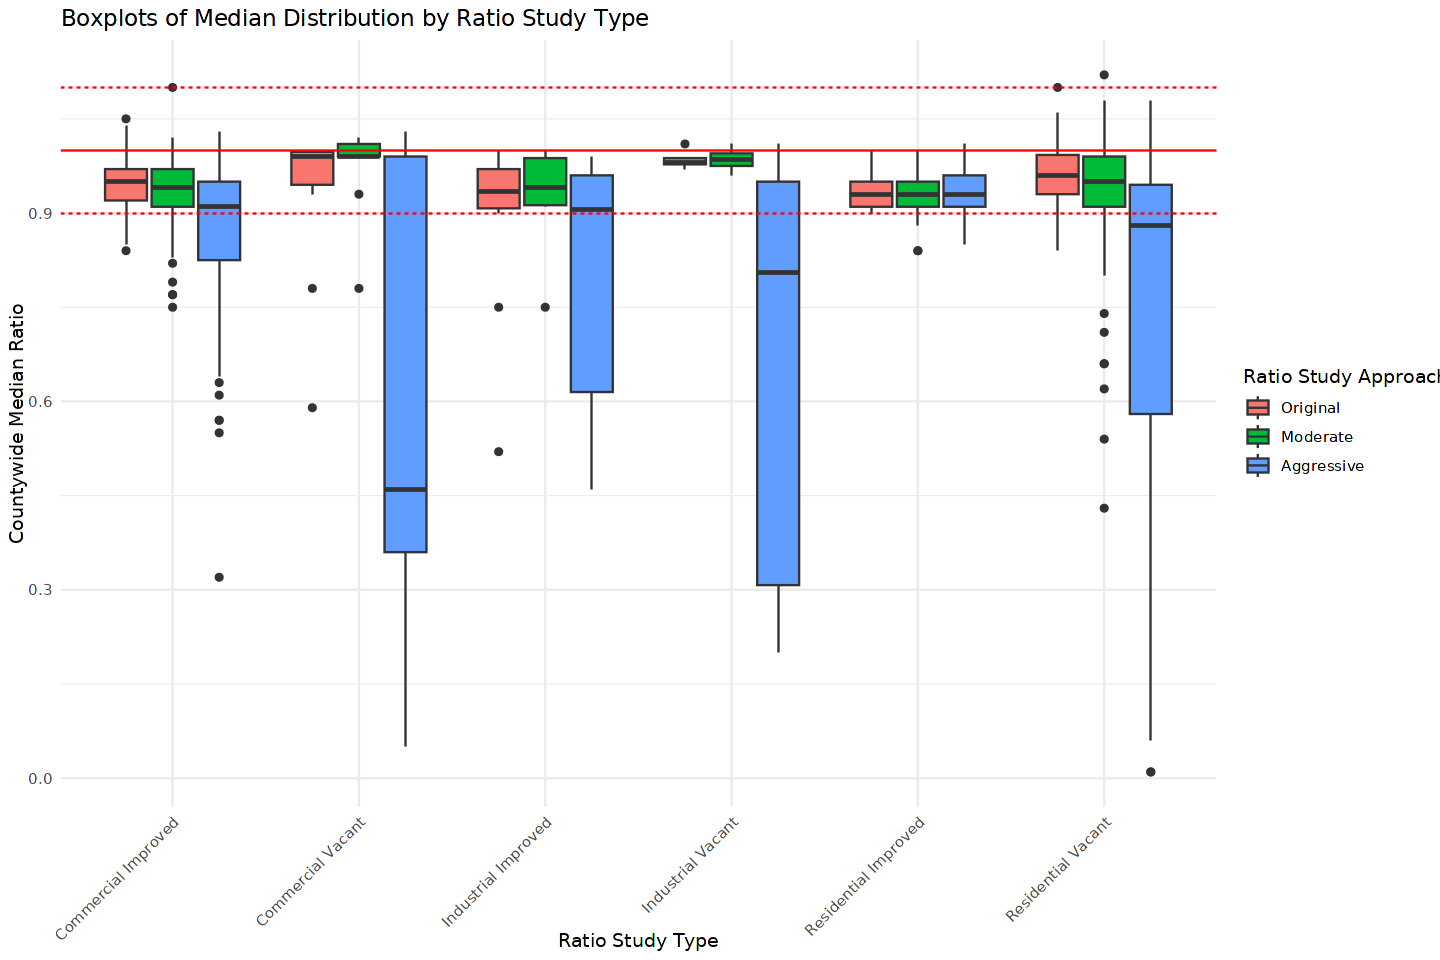

In [27]:
library(ggplot2)
library(dplyr)
options(repr.plot.width = 12, repr.plot.height = 8)  # Set width and height in inches
cresults$Added <- factor(cresults$Added, levels = c("Original", "Moderate", "Aggressive"))
head(cresults)
# Create boxplot using ggplot
ggplot(cresults, aes(x = Type, y = Median, fill = Added)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Boxplots of Median Distribution by Ratio Study Type",
       x = "Ratio Study Type",
       y = "Countywide Median Ratio",
       fill = "Ratio Study Approach") +
 geom_hline(yintercept = 1,color='red') +
geom_hline(yintercept = 0.9,linetype = 'dashed',color='red') +
geom_hline(yintercept = 1.1,linetype = 'dashed',color='red') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels



,County,Type,Grouping,Median,COD,COV,PRD,PRB,Sales,Added
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
df_sp656,Marion,Industrial Vacant,Countywide,0.97,12.33,16.91,0.97,0,6,Original
df_sp657,Marion,Industrial Improved,Countywide,0.94,10.09,13.94,1.04,0,28,Original
df_sp661,Marion,Commercial Vacant,Countywide,0.99,15.21,19.67,1.04,0,13,Original
df_sp662,Marion,Commercial Improved,Countywide,0.94,14.80,18.97,1.00,0,199,Original
df_sp672,Marion,Residential Vacant,Countywide,0.94,14.75,22.57,1.01,0,168,Original
df_sp682,Marion,Residential Improved,Countywide,0.95,13.54,36.33,1.03,0,16878,Original


Warning message:
"Removed 801 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


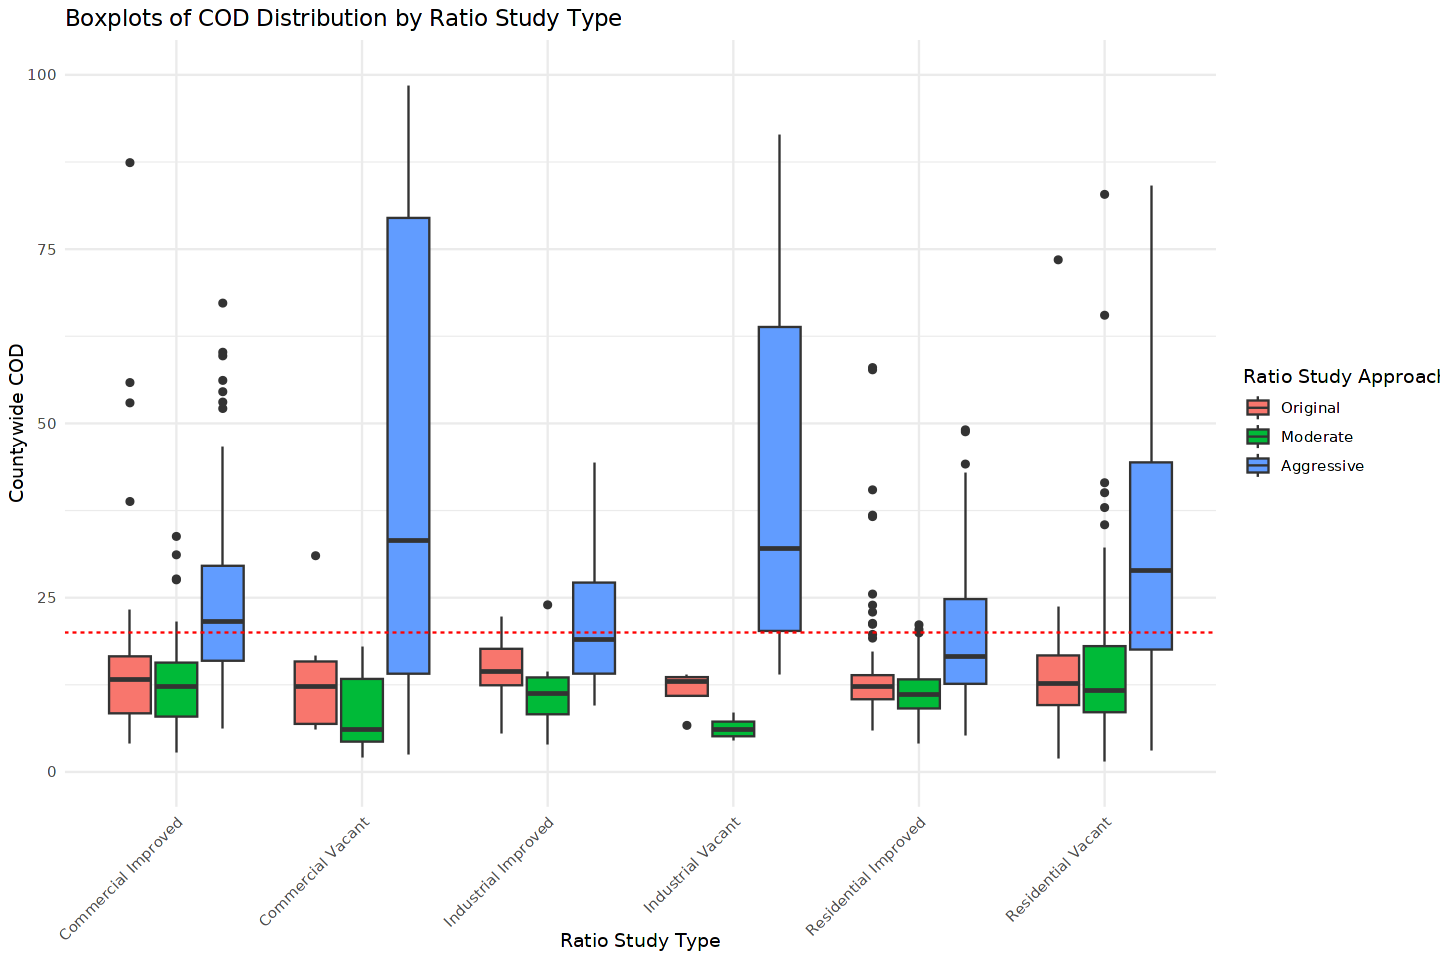

In [28]:
library(ggplot2)
library(dplyr)

cresults$Added <- factor(cresults$Added, levels = c("Original", "Moderate", "Aggressive"))
head(cresults)
# Create boxplot using ggplot
ggplot(cresults, aes(x = Type, y = COD, fill = Added)) +
  geom_boxplot() +
  theme_minimal() +
ylim(0,100) +
  labs(title = "Boxplots of COD Distribution by Ratio Study Type",
       x = "Ratio Study Type",
       y = "Countywide COD",
       fill = "Ratio Study Approach") +
geom_hline(yintercept = 20,linetype = 'dashed',color='red') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

,County,Type,Grouping,Median,COD,COV,PRD,PRB,Sales,Added
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
df_sp656,Marion,Industrial Vacant,Countywide,0.97,12.33,16.91,0.97,0,6,Original
df_sp657,Marion,Industrial Improved,Countywide,0.94,10.09,13.94,1.04,0,28,Original
df_sp661,Marion,Commercial Vacant,Countywide,0.99,15.21,19.67,1.04,0,13,Original
df_sp662,Marion,Commercial Improved,Countywide,0.94,14.80,18.97,1.00,0,199,Original
df_sp672,Marion,Residential Vacant,Countywide,0.94,14.75,22.57,1.01,0,168,Original
df_sp682,Marion,Residential Improved,Countywide,0.95,13.54,36.33,1.03,0,16878,Original


Warning message:
"Removed 872 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


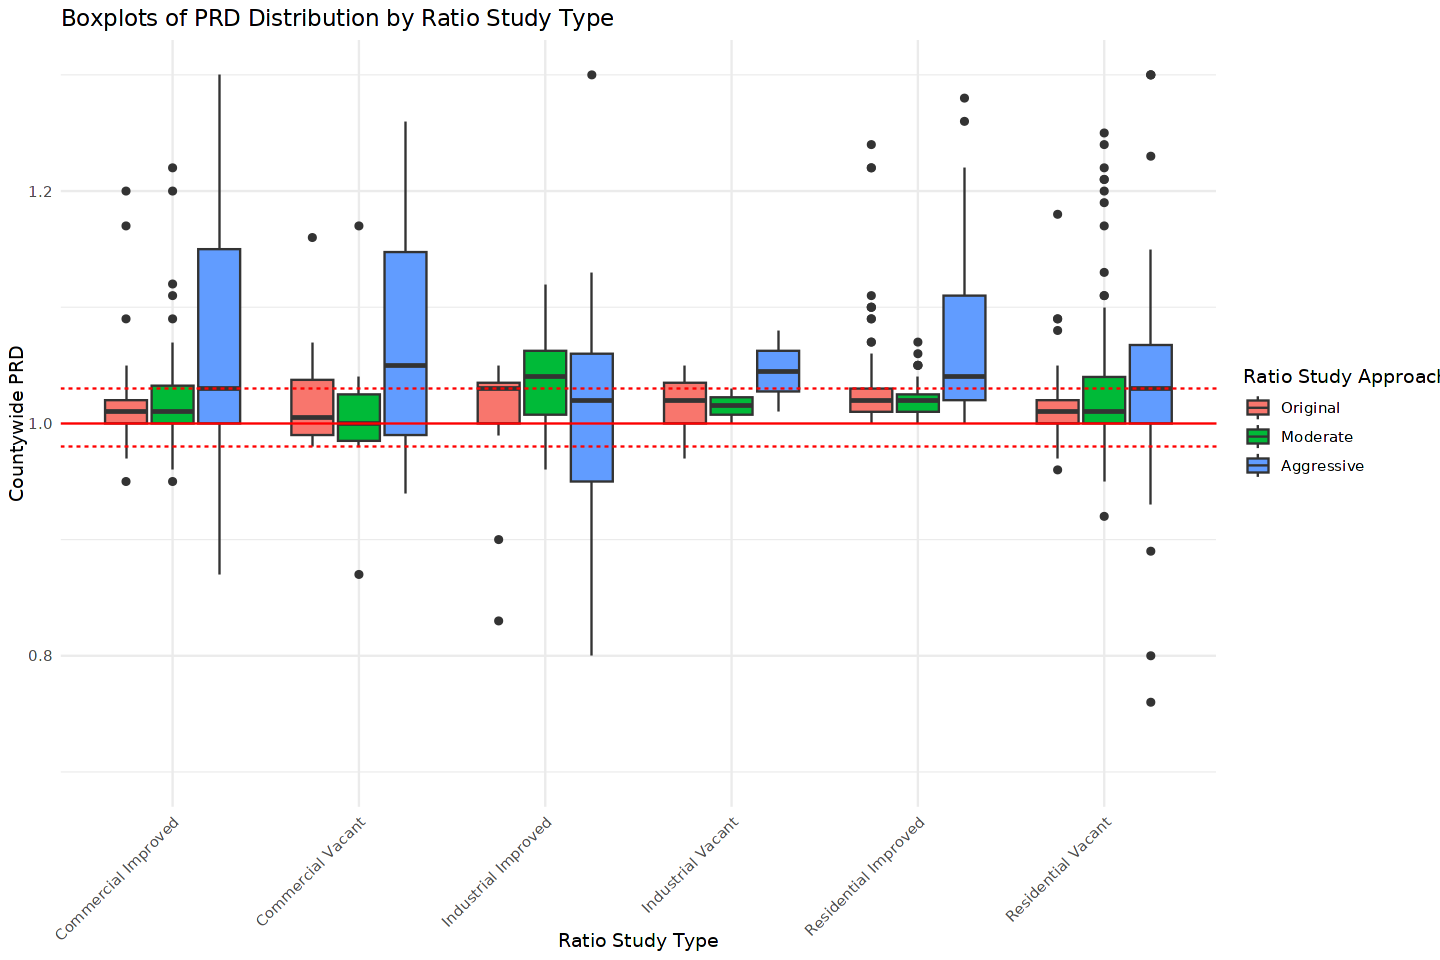

In [29]:
library(ggplot2)
library(dplyr)

cresults$Added <- factor(cresults$Added, levels = c("Original", "Moderate", "Aggressive"))
head(cresults)
# Create boxplot using ggplot
ggplot(cresults, aes(x = Type, y = PRD, fill = Added)) +
  geom_boxplot() +
  theme_minimal() +
ylim(0.7,1.3) + 
  labs(title = "Boxplots of PRD Distribution by Ratio Study Type",
       x = "Ratio Study Type",
       y = "Countywide PRD",
       fill = "Ratio Study Approach") +
geom_hline(yintercept = 1,color='red') +
geom_hline(yintercept = 0.98,linetype = 'dashed',color='red') +
geom_hline(yintercept = 1.03,linetype = 'dashed',color='red') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

,County,Type,Grouping,Median,COD,COV,PRD,PRB,Sales,Added,AddedSales
,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<dbl>
df_sp6671,Marion,Industrial Vacant,Countywide,0.96,6.80,11.93,1.02,0,5,Moderate,-14.285714
df_sp6681,Marion,Industrial Improved,Countywide,0.94,9.15,12.19,1.04,0,27,Moderate,-3.448276
df_sp6731,Marion,Commercial Improved,Countywide,0.94,12.12,14.62,1.00,0,182,Moderate,-8.500000
df_sp6831,Marion,Residential Vacant,Countywide,0.94,11.16,13.48,1.00,0,153,Moderate,-8.875740
df_sp6921,Marion,Residential Improved,Countywide,0.95,9.66,12.27,1.01,0,16232,Moderate,-3.827241
df_sp3351,Hamilton,Commercial Vacant,Countywide,1.00,5.12,9.71,0.99,0,15,Moderate,-5.882353


Warning message:
"Removed 36 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


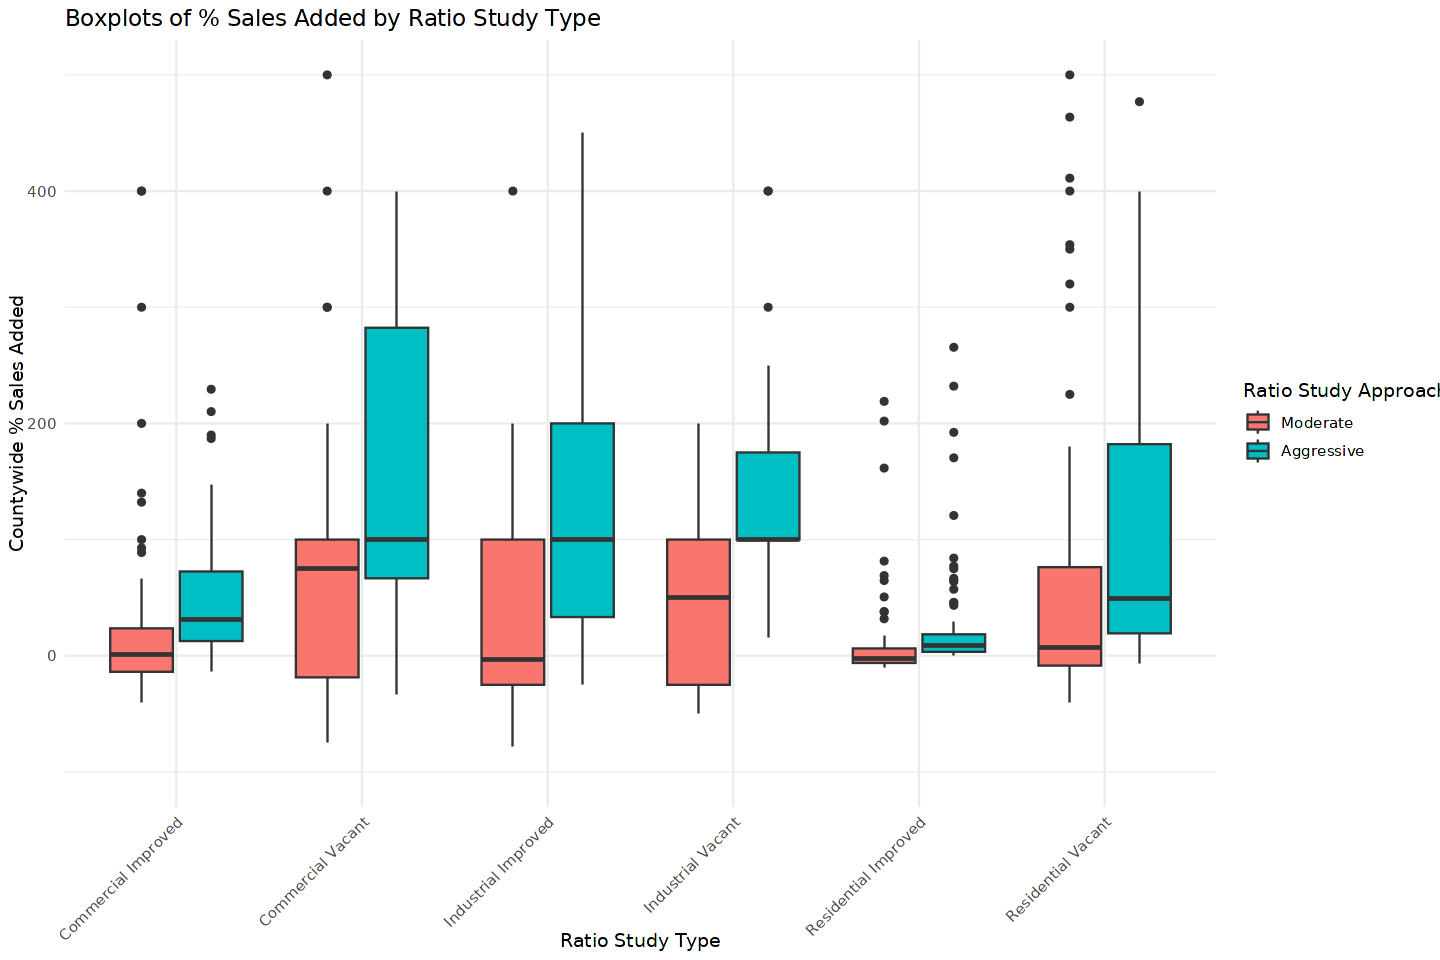

In [30]:
library(ggplot2)
library(dplyr)

cresults$AddedSales = 0
for (i in (1:nrow(cresults))) {
    ogsale = ogresult[ogresult$County == cresults[i,]$County & ogresult$Type == cresults[i,]$Type & ogresult$Grouping == 'Countywide',]
    cresults[i,]$AddedSales = (cresults[i,]$Sales - ogsale$Sales) / (ogsale$Sales + 1) * 100
}
cresults = cresults[cresults$AddedSales != 0,]
cresults$Added <- factor(cresults$Added, levels = c("Original", "Moderate", "Aggressive"))
head(cresults)
# Create boxplot using ggplot
ggplot(cresults, aes(x = Type, y = AddedSales, fill = Added)) +
  geom_boxplot() +
  theme_minimal() +
ylim(-100,500) +
  labs(title = "Boxplots of % Sales Added by Ratio Study Type",
       x = "Ratio Study Type",
       y = "Countywide % Sales Added",
       fill = "Ratio Study Approach") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

In [31]:
ratcimp = rat23[rat23$PropertyClass < 500 & rat23$PropertyClass > 400,1:10]
exccimp = exc23[exc23$PropertyClass < 500 & exc23$PropertyClass > 400 & exc23$Explanation %in% aggressive,1:10]
cimp = rbind(ratcimp,exccimp)

In [32]:
sort(table(cimp$PropertyClass), decreasing = TRUE)


401 499 447 429 420 430 442 419 455 425 403 454 480 456 431 402 481 444 450 452 
559 534 520 469 396 177 174 137 120 115 103  98  91  72  71  69  67  41  38  34 
410 453 415 422 411 421 428 440 449 426 439 412 435 441 416 451 409 464 448 465 
 26  23  22  20  19  17  17  15  15  14  14  12  12  12   9   6   5   5   4   4 
445 460 463 482 490 427 467 498 424 434 443 462 
  3   3   3   3   3   2   2   2   1   1   1   1 

In [33]:
library(dplyr)
cimp_class = cimp %>% 
group_by(PropertyClass) %>%
summarise(PropertyClass = PropertyClass[1],SaleRatio = median(SaleRatio),Count = n(),Influence = (abs(1-SaleRatio) * (Count / nrow(cimp))) * 1000)
head(cimp_class[order(-cimp_class$Influence),],15)

PropertyClass,SaleRatio,Count,Influence
<int>,<dbl>,<int>,<dbl>
499,0.8925000,534,13.664604
403,0.4877018,103,12.560514
401,0.9223810,559,10.328267
420,0.8947917,396,9.917282
429,0.9176000,469,9.199143
447,0.9305980,520,8.590578
425,0.8258065,115,4.768450
454,0.7963945,98,4.749663
456,0.7300701,72,4.626268


In [34]:
ratiimp = rat23[rat23$PropertyClass < 400 & rat23$PropertyClass > 300,1:10]
exciimp = exc23[exc23$PropertyClass < 400 & exc23$PropertyClass > 300 & exc23$Explanation %in% aggressive,1:10]
iimp = rbind(ratiimp,exciimp)

In [35]:
iimp_class = iimp %>% 
group_by(PropertyClass) %>%
summarise(PropertyClass = PropertyClass[1],SaleRatio = median(SaleRatio),Count = n(),Influence = (abs(1-SaleRatio) * (Count / nrow(iimp))) * 1000)
head(iimp_class[order(-iimp_class$Influence),],15)

PropertyClass,SaleRatio,Count,Influence
<int>,<dbl>,<int>,<dbl>
350,0.7877143,145,66.1966206
340,0.8475490,126,41.3092979
370,0.8200000,65,25.1612903
360,0.7062502,16,10.1075183
310,0.4221818,7,8.6983382
380,0.6056370,4,3.3923701
399,0.9754386,51,2.6938314
345,0.9026667,9,1.8838710
320,0.7827863,3,1.4013785


In [36]:
ratrimp = rat23[rat23$PropertyClass < 600 & rat23$PropertyClass > 509,1:10]
excrimp = exc23[exc23$PropertyClass < 600 & exc23$PropertyClass > 509 & exc23$Explanation %in% aggressive,1:10]
rimp = rbind(ratrimp,excrimp)

In [37]:
rimp_class = rimp %>% 
group_by(PropertyClass) %>%
summarise(PropertyClass = PropertyClass[1],SaleRatio = median(SaleRatio),Count = n(),Influence = (abs(1-SaleRatio) * (Count / nrow(rimp))) * 1000)
head(rimp_class[order(-rimp_class$Influence),],15)

PropertyClass,SaleRatio,Count,Influence
<int>,<dbl>,<int>,<dbl>
510,0.9463986,99616,42.857021401
511,0.9360000,12495,6.418492656
550,0.9342481,4990,2.633452763
520,0.9562500,3135,1.100860824
599,0.8620489,858,0.950012724
540,0.9347826,999,0.522932610
541,0.9227586,753,0.466833282
551,0.9078947,293,0.216605202
512,0.9309270,262,0.145253379


In [38]:
ratrvac = rat23[rat23$PropertyClass < 510 & rat23$PropertyClass >= 500,1:10]
excrvac = exc23[exc23$PropertyClass < 510 & exc23$PropertyClass >= 500 & exc23$Explanation %in% aggressive,1:10]
rvac = rbind(ratrvac,excrvac)

In [39]:
rvac_class = rvac %>% 
group_by(PropertyClass) %>%
summarise(PropertyClass = PropertyClass[1],SaleRatio = median(SaleRatio),Count = n(),Influence = (abs(1-SaleRatio) * (Count / nrow(rvac))) * 1000)
head(rvac_class[order(-rvac_class$Influence),],15)

PropertyClass,SaleRatio,Count,Influence
<int>,<dbl>,<int>,<dbl>
500,0.9654545,6079,29.983126525
501,0.8543216,749,15.578684455
509,0.2314286,51,5.596393897
502,0.9176056,61,0.717597992
504,0.8545617,8,0.166120304
503,0.9895641,28,0.041719697
505,0.9969314,8,0.003504931
NA,NA,20,NA


In [40]:
pclassinfluence = rbind(rvac_class,rimp_class,iimp_class,cimp_class)

In [41]:
head(pclassinfluence[order(-pclassinfluence$Influence),],15)

PropertyClass,SaleRatio,Count,Influence
<int>,<dbl>,<int>,<dbl>
350,0.7877143,145,66.196621
510,0.9463986,99616,42.857021
340,0.8475490,126,41.309298
500,0.9654545,6079,29.983127
370,0.8200000,65,25.161290
501,0.8543216,749,15.578684
499,0.8925000,534,13.664604
403,0.4877018,103,12.560514
401,0.9223810,559,10.328267


In [42]:
ratx = rat23[,1:10]
excx = exc23[exc23$Explanation %in% aggressive,c(1:10,12)]
ratx$Explanation = 'ON RATIO STUDY'
cx = rbind(ratx,excx)

In [43]:
excinf = cx %>% 
group_by(Explanation) %>%
summarise(SaleRatio = median(SaleRatio),Count = n(),Influence = (abs(1-SaleRatio) * (Count / nrow(cx))) * 1000)
head(excinf[order(-excinf$Influence),],15)

Explanation,SaleRatio,Count,Influence
<chr>,<dbl>,<int>,<dbl>
ON RATIO STUDY,0.9448938,116833,47.0489028
AV DOES NOT REFLECT MARKET VALUE,0.7668394,3799,6.4730395
INVESTMENT/RENTAL,0.9197044,8013,4.7018684
INSUFFICIENT TIME ON MARKET,1.2875000,1485,3.1199531
NOT ENOUGH SALES FOR TRENDING,0.8875835,2184,1.7941819
SOLD AS IS,1.5982857,384,1.6788953
VACANT LAND,0.9207547,2617,1.5155173
MULTI PARCEL SALE,0.8280000,911,1.1450662
LEASE,0.4907691,268,0.9973172


In [44]:
priceinf = rimp %>% 
group_by(floor(SalePrice / 10000)) %>%
summarise(SalePrice = floor(SalePrice / 10000)[1] * 10000, SaleRatio = median(SaleRatio),Count = n(),Influence = (abs(1-SaleRatio) * (Count / nrow(rimp))) * 1000)
head(priceinf[order(-priceinf$Influence),],10)

floor(SalePrice/10000),SalePrice,SaleRatio,Count,Influence
<dbl>,<dbl>,<dbl>,<int>,<dbl>
0,0,5.4666667,483,17.315996
1,10000,2.0315789,871,7.211696
2,20000,1.4515306,1240,4.493924
4,40000,1.1576389,2008,2.540644
3,30000,1.1861905,1654,2.471780
15,150000,0.9328034,4300,2.319169
16,160000,0.9327273,4137,2.233785
13,130000,0.9307692,3894,2.163774
22,220000,0.9277273,3675,2.131811


In [45]:
priceinf = cimp %>% 
group_by(floor(SalePrice / 10000)) %>%
summarise(SalePrice = floor(SalePrice / 10000)[1] * 10000, SaleRatio = median(SaleRatio),Count = n(),Influence = (abs(1-SaleRatio) * (Count / nrow(cimp))) * 1000)
head(priceinf[order(-priceinf$Influence),],10)

floor(SalePrice/10000),SalePrice,SaleRatio,Count,Influence
<dbl>,<dbl>,<dbl>,<int>,<dbl>
0,0,2.4418269,22,7.550629
150,1500000,0.3872425,19,2.771338
95,950000,0.4482632,18,2.364024
1,10000,1.2933333,33,2.304213
15,150000,0.9440000,153,2.039514
40,400000,0.8605000,61,2.025589
20,200000,0.9065000,85,1.891811
32,320000,0.8615625,57,1.878347
130,1300000,0.2897692,11,1.859685


In [46]:
priceinf = iimp %>% 
group_by(floor(SalePrice / 10000)) %>%
summarise(SalePrice = floor(SalePrice / 10000)[1] * 10000, SaleRatio = median(SaleRatio),Count = n(),Influence = (abs(1-SaleRatio) * (Count / nrow(iimp))) * 1000)
head(priceinf[order(-priceinf$Influence),],10)

floor(SalePrice/10000),SalePrice,SaleRatio,Count,Influence
<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,10000,5.8113158,2,20.693831
61,610000,6.1664781,1,11.110706
60,600000,0.4885000,7,7.700000
150,1500000,0.6061333,7,5.929176
30,300000,0.8200000,13,5.032258
100,1000000,0.7035000,7,4.463441
55,550000,0.7949091,9,3.969501
25,250000,0.8280000,9,3.329032
120,1200000,0.6148333,4,3.313262


In [47]:
priceinf = rvac %>% 
group_by(floor(SalePrice / 10000)) %>%
summarise(SalePrice = floor(SalePrice / 10000)[1] * 10000, SaleRatio = median(SaleRatio),Count = n(),Influence = (abs(1-SaleRatio) * (Count / nrow(rvac))) * 1000)
head(priceinf[order(-priceinf$Influence),],10)

floor(SalePrice/10000),SalePrice,SaleRatio,Count,Influence
<dbl>,<dbl>,<dbl>,<int>,<dbl>
8,80000,1.1880710,330,8.861140
2,20000,0.9360000,641,5.857224
5,50000,0.9200000,423,4.831525
1,10000,0.9532710,687,4.583496
16,160000,0.7060606,78,3.273454
3,30000,0.9666667,589,2.803160
15,150000,0.8329489,104,2.480484
20,200000,0.7474685,62,2.235431
14,140000,0.8467488,86,1.881726


In [48]:
rat5 = rat23[rat23$PropertyClass == 509,]

In [49]:
table(rat5$County)


      Allen        Clay   Hendricks    Marshall      Martin      Porter 
          2           1           1           1           1           2 
    Steuben Vanderburgh 
          1           5 

In [50]:
exc5 = exc23[exc23$PropertyClass == 509,]

In [51]:
table(exc5$County)


Bartholomew        Clay     Elkhart   Hendricks     Johnson     Laporte 
          3           3          11           2           4          13 
   Lawrence    Marshall      Monroe      Orange      Porter     Steuben 
          5           3           2           1           4          57 
Vanderburgh       Wayne 
         20           1 

In [52]:
exc0 = exc23[exc23$PropertyClass < 500 & exc23$PropertyClass > 400 & exc23$Explanation %in% aggressive & exc23$SalePrice < 10000,]

In [53]:
table(exc0$Explanation)


AV DOES NOT REFLECT MARKET VALUE      INSUFFICIENT TIME ON MARKET 
                               5                                2 
               INVESTMENT/RENTAL                MULTI PARCEL SALE 
                               7                                1 
   NOT ENOUGH SALES FOR TRENDING 
                               3 